## Reading the Datasets

In [67]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter

In [68]:
df_ages = pd.read_csv('COMP40307 practical 2 ages.csv')
df_diab = pd.read_csv('COMP40370 Practical 1diabetes.csv')

print(f'There are {df_ages.shape[0]} rows and {df_ages.shape[1]} columns in the ages dataset')
print(f'The columns are: {df_ages.columns[0]} and {df_ages.columns[1]}')

There are 119 rows and 2 columns in the ages dataset
The columns are: Age and AgeGroup


In [69]:
# checking for bullsabs

df_diab.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure               23
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [70]:
# removing blanks in diabetes table

df_diab.dropna(subset = 'BloodPressure', inplace = True)

In [71]:
# What are the kurtosis and skewness values of the Insulin attribute?

Kurtosis, Skewness = df_diab.kurtosis(numeric_only = True), df_diab.skew(numeric_only = True)
data = {'Kurtosis':Kurtosis,'Skewness':Skewness}
Stats = pd.DataFrame(data=data, columns= ['Kurtosis','Skewness'])

In [72]:
print(f"The kurtosis of insulin column is: {round(Stats.loc['Insulin','Kurtosis'], 2)} and the skewness is {round(Stats.loc['Insulin','Skewness'], 2)}")

The kurtosis of insulin column is: 7.36 and the skewness is 2.27


## INSULIN

* Outliers
* Transformation

In [73]:
# selecting the insulin column

diab_Insulin = df_diab['Insulin'][df_diab['Insulin'] != 0]

In [74]:
# identifying and removing outliers
# Identifing outliers using Inter Quartile Range (IQR) approach and impute them with 
#     min and max values appropriately. Then draw the histogram again to observe the difference

# 1st and 3rd quartile
Q1 = diab_Insulin.quantile(0.25)
Q3 = diab_Insulin.quantile(0.75)

# Interquartile Range
IQR = Q3 - Q1

upper = Q3 + (1.5*IQR)
lower = Q1 - (1.5*IQR)

# capping outliers
Insulin_capped = np.where(diab_Insulin>upper, upper,diab_Insulin)

# removing outliers
Insulin_noO = diab_Insulin[(diab_Insulin < upper) & (diab_Insulin > lower)]



In [75]:
# Transform Insulin column using loge (x) formula
## calculating the kurtosis and skewness

trans_Insulin = np.log(diab_Insulin)
trans_Insulin_kurt = stats.kurtosis(trans_Insulin)
trans_Insulin_skew = stats.skew(trans_Insulin)

In [76]:
# Transform capped Insulin column using loge (x) formula
## calculating the kurtosis and skewness

trans_Insulin_capped = np.log(Insulin_capped)
trans_Insulin_capped_kurt = stats.kurtosis(trans_Insulin_capped)
trans_Insulin_capped_skew = stats.skew(trans_Insulin_capped)


In [77]:
# Transform Insulin column with no outliers using loge (x) formula
## calculating the kurtosis and skewness

trans_Insulin_noO = np.log(Insulin_noO)
trans_Insulin_noO_kurt = stats.kurtosis(trans_Insulin_noO)
trans_Insulin_noO_skew = stats.skew(trans_Insulin_noO)

In [78]:
# DataFrame of Kurtosis and Skewness

diab_insulin_kurt = Stats.loc['Insulin','Kurtosis']
diab_insulin_skew = Stats.loc['Insulin','Skewness']

pd.DataFrame({'Kurtosis': [diab_insulin_kurt, trans_Insulin_kurt, trans_Insulin_capped_kurt, trans_Insulin_noO_kurt], \
             'Skewness': [diab_insulin_skew, trans_Insulin_skew, trans_Insulin_capped_skew, trans_Insulin_noO_skew]}, \
            index=['Insulin', 'Insulin Transformed', 'Capped Transformed', 'No outlier Transormed'])

,Kurtosis,Skewness
Insulin,7.355577,2.271752
Insulin Transformed,0.345176,-0.134421
Capped Transformed,0.135026,-0.425173
No outlier Transormed,0.375630,-0.583130


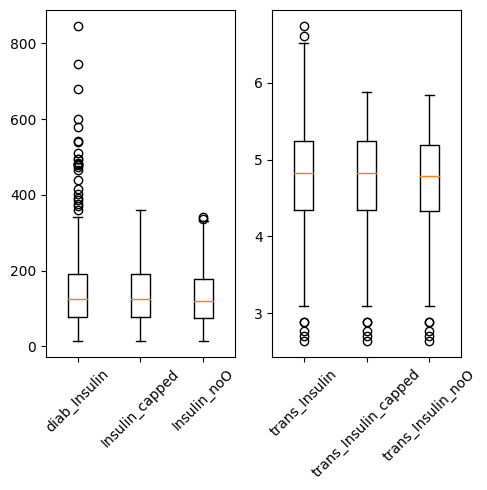

In [79]:
# boxplot of insulin, capped, no outliers and their trasnformations

x = [diab_Insulin, Insulin_capped, Insulin_noO]; xlabel = ['diab_Insulin', 'Insulin_capped', 'Insulin_noO']
y = [trans_Insulin, trans_Insulin_capped, trans_Insulin_noO]; ylabel = ['trans_Insulin', 'trans_Insulin_capped', 'trans_Insulin_noO']
fig, ax = plt.subplots(ncols=2,nrows=1, figsize=(5,5))
ax[0].boxplot(x)
ax[1].boxplot(y)

ax[0].set_xticklabels(xlabel, rotation=45)
ax[1].set_xticklabels(ylabel, rotation=45)
plt.tight_layout()
plt.show()

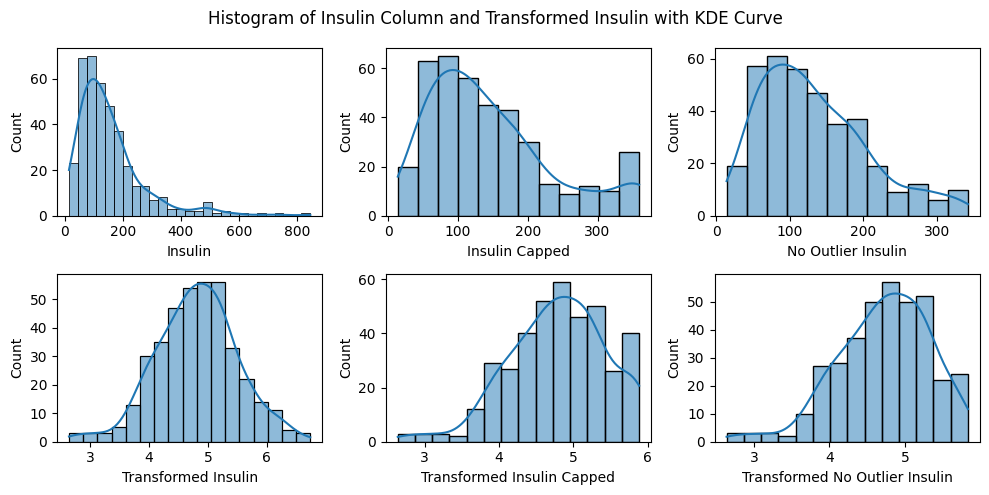

In [80]:
# histogram of insulin, capped, no outliers and their trasnformations

fig, ax = plt.subplots(nrows=2, ncols=3, figsize = (10,5))
sns.histplot(diab_Insulin, kde=True, ax=ax[0,0])
sns.histplot(Insulin_capped, kde=True, ax=ax[0,1])
sns.histplot(Insulin_noO, kde=True, ax=ax[0,2])

sns.histplot(trans_Insulin, kde=True, ax=ax[1,0])
sns.histplot(trans_Insulin_capped, kde=True, ax=ax[1,1])
sns.histplot(trans_Insulin_noO, kde=True, ax=ax[1,2])

ax[0,0].set_xlabel('Insulin')
ax[0,1].set_xlabel('Insulin Capped')
ax[0,2].set_xlabel('No Outlier Insulin')

ax[1,0].set_xlabel('Transformed Insulin')
ax[1,1].set_xlabel('Transformed Insulin Capped')
ax[1,2].set_xlabel('Transformed No Outlier Insulin')

fig.suptitle('Histogram of Insulin Column and Transformed Insulin with KDE Curve')
plt.tight_layout()
plt.show()

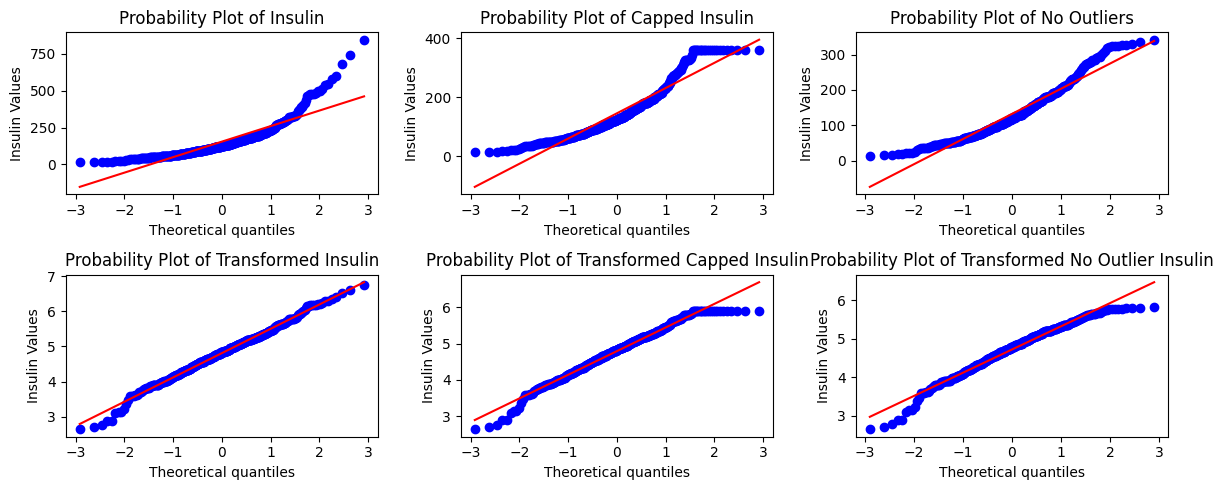

In [81]:
# probability plot of insulin, capped, no outliers and their trasnformations

plt.figure(figsize=(12,5))


plt.subplot(2,3,1)
stats.probplot(diab_Insulin, dist='norm', plot=plt)
plt.title('Probability Plot of Insulin')
plt.ylabel('Insulin Values')

plt.subplot(2,3,2)
stats.probplot(Insulin_capped, dist='norm', plot=plt)
plt.title('Probability Plot of Capped Insulin')
plt.ylabel('Insulin Values')

plt.subplot(2,3,3)
stats.probplot(Insulin_noO, dist='norm', plot=plt)
plt.title('Probability Plot of No Outliers')
plt.ylabel('Insulin Values')

plt.subplot(2,3,4)
stats.probplot(trans_Insulin, dist='norm', plot=plt)
plt.title('Probability Plot of Transformed Insulin')
plt.ylabel('Insulin Values')

plt.subplot(2,3,5)
stats.probplot(trans_Insulin_capped, dist='norm', plot=plt)
plt.title('Probability Plot of Transformed Capped Insulin')
plt.ylabel('Insulin Values')

plt.subplot(2,3,6)
stats.probplot(trans_Insulin_noO, dist='norm', plot=plt)
plt.title('Probability Plot of Transformed No Outlier Insulin')
plt.ylabel('Insulin Values')

plt.tight_layout()
plt.show()

## GLUCOSE

* Outliers
* Transformation

In [82]:
# selecting glucose

glucose = df_diab[df_diab['Glucose'] != 0]['Glucose']

gluc_kurt = stats.kurtosis(glucose)
gluc_skew = stats.skew(glucose)

In [83]:
# identifying and removing outliers
# Identifing outliers using Inter Quartile Range (IQR) approach and impute them with 
#     min and max values appropriately. Then draw the histogram again to observe the difference


Q1_1 = glucose.quantile(0.25)
Q3_1 = glucose.quantile(0.75)

IQR_1 = Q3_1 - Q1_1

upper_1 = Q3_1 + (1.5 * IQR_1)
lower_1 = Q1_1 - (1.5 * IQR_1)


# capping outliers
gluc_capped = np.where(glucose < lower_1, lower_1, glucose)

# eliminating outliers
gluc_noO = glucose[(glucose < glucose.quantile(0.99)) & (glucose > glucose.quantile(0.01))]

In [84]:
# Transform glucose column using loge (x) formula
## calculating the kurtosis and skewness

trans_gluc = np.log(glucose)
trans_gluc_kurt = stats.kurtosis(trans_gluc)
trans_gluc_skew = stats.skew(trans_gluc)

In [85]:
# Transform capped glucose column using loge (x) formula
## calculating the kurtosis and skewness

trans_gluc_capped = np.log(gluc_capped)
trans_gluc_capped_kurt = stats.kurtosis(trans_gluc_capped)
trans_gluc_capped_skew = stats.skew(trans_gluc_capped)

In [86]:
# Transform no outlier glucose column using loge (x) formula
## calculating the kurtosis and skewness

trans_gluc_noO = np.log(gluc_noO)
trans_gluc_noO_kurt = stats.kurtosis(trans_gluc_noO)
trans_gluc_noO_skew = stats.skew(trans_gluc_noO)

In [87]:
# creating a DataFrame of the Kurtosis and Skewness


pd.DataFrame({'Kurtosis': [gluc_kurt, trans_gluc_kurt, trans_gluc_capped_kurt, trans_gluc_noO_kurt], \
             'Skewness': [gluc_skew, trans_gluc_skew, trans_gluc_capped_skew, trans_gluc_noO_skew]}, \
            index=['Insulin', 'Insulin Transformed', 'Capped Transformed', 'No outlier Transormed'])

,Kurtosis,Skewness
Insulin,-0.266792,0.527016
Insulin Transformed,-0.145414,-0.074813
Capped Transformed,-0.145414,-0.074813
No outlier Transormed,-0.620127,0.090638


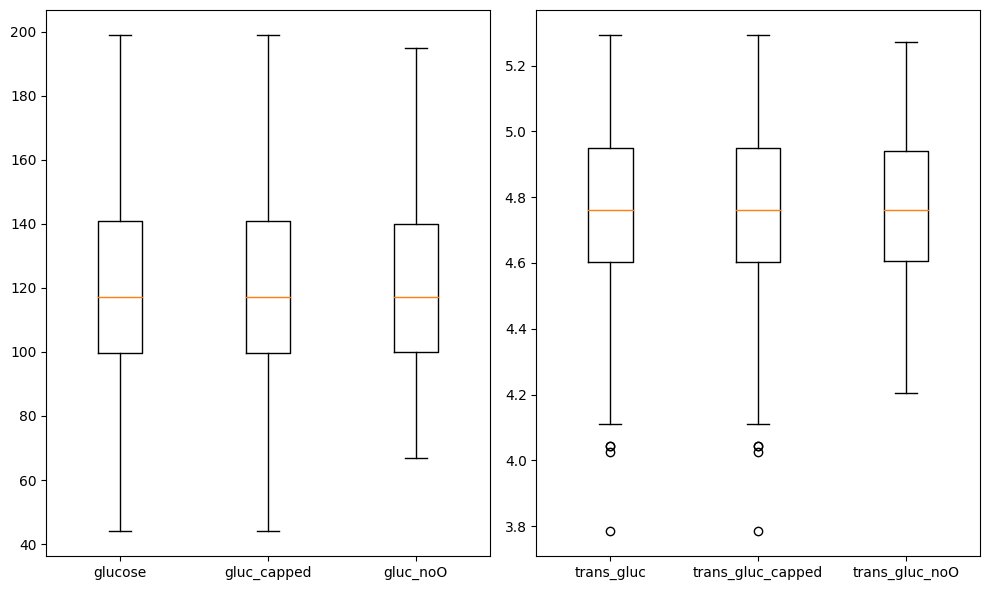

In [88]:
# boxplot of glucose, capped, no outliers and their trasnformations

x_1= [glucose, gluc_capped, gluc_noO]; xlabel_1 = ['glucose', 'gluc_capped', 'gluc_noO']
x_2= [trans_gluc, trans_gluc_capped, trans_gluc_noO]; xlabel_2 = ['trans_gluc', 'trans_gluc_capped', 'trans_gluc_noO']

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.boxplot(x= x_1, labels=xlabel_1)

plt.subplot(1,2,2)
plt.boxplot(x= x_2, labels=xlabel_2)


plt.tight_layout()
plt.show()

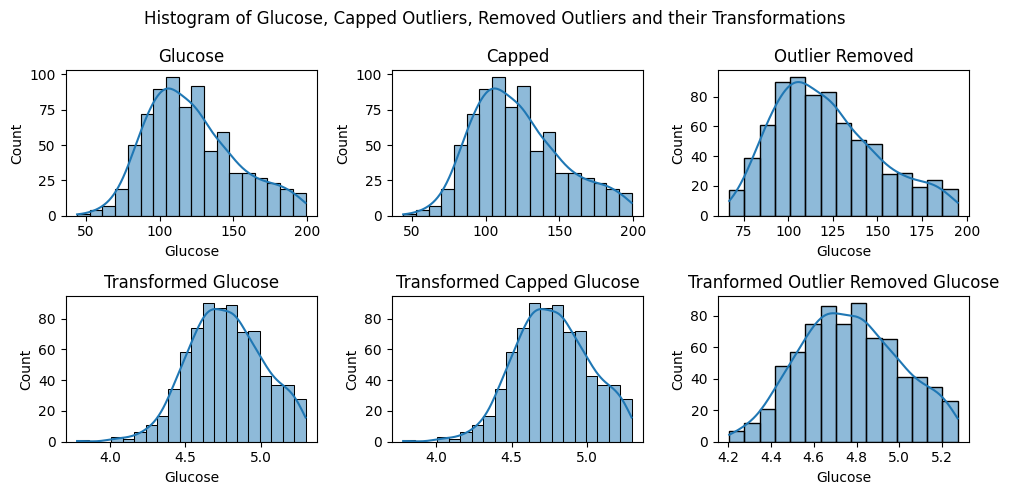

In [89]:
# histogram of glucose, capped, no outliers and their transformationsabs

plt.figure(figsize=(10,5))

plt.subplot(2,3,1)
sns.histplot(x=glucose, kde=True)
plt.title('Glucose')

plt.subplot(2,3,2)
sns.histplot(x=gluc_capped, kde=True)
plt.title('Capped')

plt.subplot(2,3,3)
sns.histplot(x=gluc_noO, kde=True)
plt.title('Outlier Removed')

plt.subplot(2,3,4)
sns.histplot(x=trans_gluc, kde=True)
plt.title('Transformed Glucose')

plt.subplot(2,3,5)
sns.histplot(x=trans_gluc_capped, kde=True)
plt.title('Transformed Capped Glucose')

plt.subplot(2,3,6)
sns.histplot(x=trans_gluc_noO, kde=True)
plt.title('Tranformed Outlier Removed Glucose')

plt.suptitle('Histogram of Glucose, Capped Outliers, Removed Outliers and their Transformations')
plt.tight_layout()
plt.show()

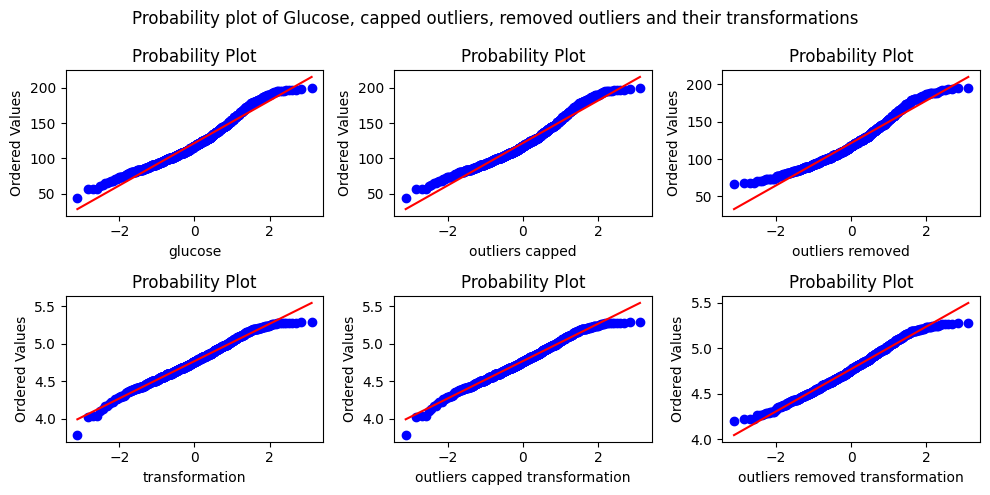

In [90]:
# probability plot of glucose, capped, no outliers and their trasnformations

plt.figure(figsize=(10, 5))

plt.subplot(2,3,1)
stats.probplot(glucose, dist='norm', plot=plt)
plt.xlabel('glucose')

plt.subplot(2,3,2)
stats.probplot(gluc_capped, dist='norm', plot=plt)
plt.xlabel('outliers capped')

plt.subplot(2,3,3)
stats.probplot(gluc_noO, dist='norm', plot=plt)
plt.xlabel('outliers removed')

plt.subplot(2,3,4)
stats.probplot(trans_gluc, dist='norm', plot=plt)
plt.xlabel('transformation')

plt.subplot(2,3,5)
stats.probplot(trans_gluc_capped, dist='norm', plot=plt)
plt.xlabel('outliers capped transformation')

plt.subplot(2,3,6)
stats.probplot(trans_gluc_noO, dist='norm', plot=plt)
plt.xlabel('outliers removed transformation')


plt.suptitle('Probability plot of Glucose, capped outliers, removed outliers and their transformations')
plt.tight_layout()
plt.show()

## BLOOD PRESSURE

* Outliers
* Transformation

In [91]:
# selecting bloodpressure and calculating kurtosis and skewness

bp = df_diab['BloodPressure'][df_diab['BloodPressure'] != 0]

bp_kurt = stats.kurtosis(bp)
bp_skew = stats.skew(bp)

In [92]:
# identifying and removing outliers

Q1_2 = bp.quantile(0.25)
Q3_2 = bp.quantile(0.75)

# Interquartile Range
IQR_2 = Q3_2 - Q1_2


# upper and lower boundaries
upper_2 = Q3_2 + (1.5*IQR_2)
lower_2 = Q1_2 - (1.5*IQR_2)

# capping outliers
bp_capped = np.where(bp>upper_2, upper_2, np.where(bp<lower_2, lower_2, bp))

# removing outliersabs
bp_noO = bp[(bp<bp.quantile(0.99)) & (bp>bp.quantile(0.01))]

In [93]:
# Transformations, kurtosis and skewness

trans_bp = np.log(bp)
trans_bp_capped = np.log(bp_capped)
trans_bp_noO = np.log(bp_noO)

trans_bp_kurt = stats.kurtosis(trans_bp)
trans_bp_capped_kurt = stats.kurtosis(trans_bp_capped)
trans_bp_noO_kurt = stats.kurtosis(trans_bp_noO)

trans_bp_skew = stats.skew(trans_bp)
trans_bp_capped_skew = stats.skew(trans_bp_capped)
trans_bp_noO_skew = stats.skew(trans_bp_noO)


In [94]:
# creating DataFrames of Kurtosis and Skewnessabs

pd.DataFrame({'Kurtosis': [bp_kurt,trans_bp_kurt,trans_bp_capped_kurt,trans_bp_noO_kurt], 'Skewness': [bp_skew,trans_bp_skew,trans_bp_capped_skew,trans_bp_noO_skew]}, \
            index=['BP', 'trans BP', 'trans BP capped', 'trans BP no Outliers'])

,Kurtosis,Skewness
BP,0.893320,0.152689
trans BP,2.923398,-0.770940
trans BP capped,0.410502,-0.441718
trans BP no Outliers,-0.212210,-0.264455


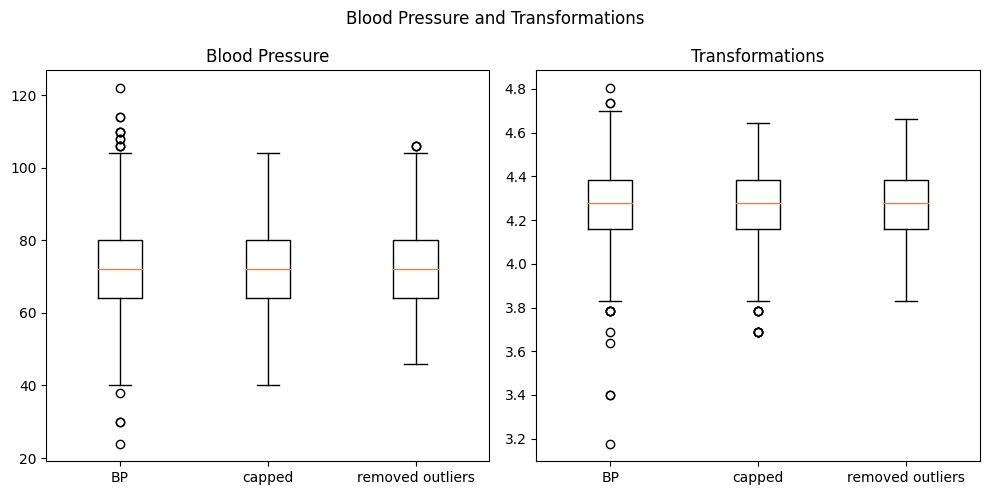

In [95]:
# boxplot of bp, capped, removed outliers and transformations
plt.figure(figsize=(10,5))
plt.suptitle('Blood Pressure and Transformations')

plt.subplot(1,2,1)
plt.title('Blood Pressure')
plt.boxplot(x=[bp, bp_capped, bp_noO], labels=['BP', 'capped', 'removed outliers'])

plt.subplot(1,2,2)
plt.title('Transformations')
plt.boxplot(x=[trans_bp, trans_bp_capped, trans_bp_noO], labels=['BP', 'capped', 'removed outliers'])

plt.tight_layout()
plt.show()

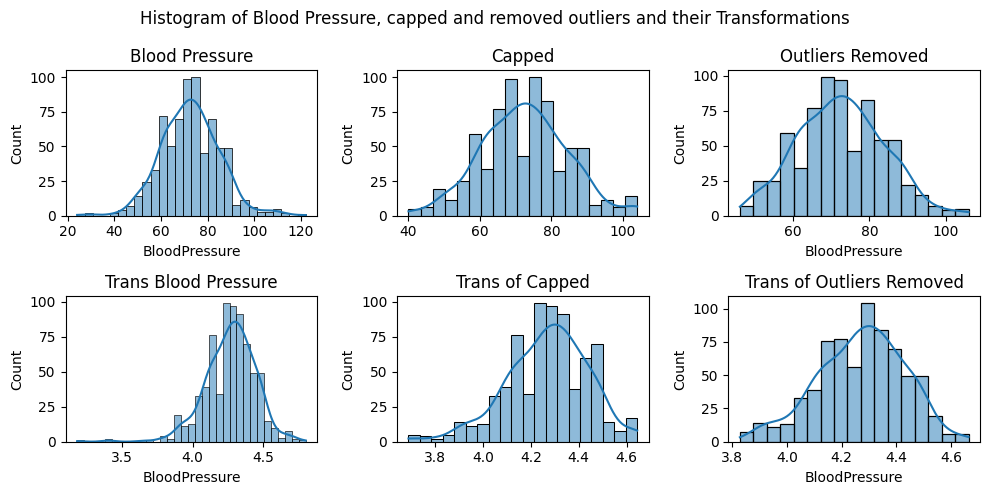

In [96]:
# histogram of bp, capped, removed outliers and transformations

plt.figure(figsize=(10,5))
plt.suptitle('Histogram of Blood Pressure, capped and removed outliers and their Transformations')

plt.subplot(2,3,1)
plt.title('Blood Pressure')
sns.histplot(x= bp, kde=True)

plt.subplot(2,3,2)
plt.title('Capped')
sns.histplot(x= bp_capped, kde=True)

plt.subplot(2,3,3)
plt.title('Outliers Removed')
sns.histplot(x= bp_noO, kde=True)

plt.subplot(2,3,4)
plt.title('Trans Blood Pressure')
sns.histplot(x= trans_bp, kde=True)

plt.subplot(2,3,5)
plt.title('Trans of Capped')
sns.histplot(x= trans_bp_capped, kde=True)

plt.subplot(2,3,6)
plt.title('Trans of Outliers Removed')
sns.histplot(x= trans_bp_noO, kde=True)

plt.tight_layout()
plt.show()

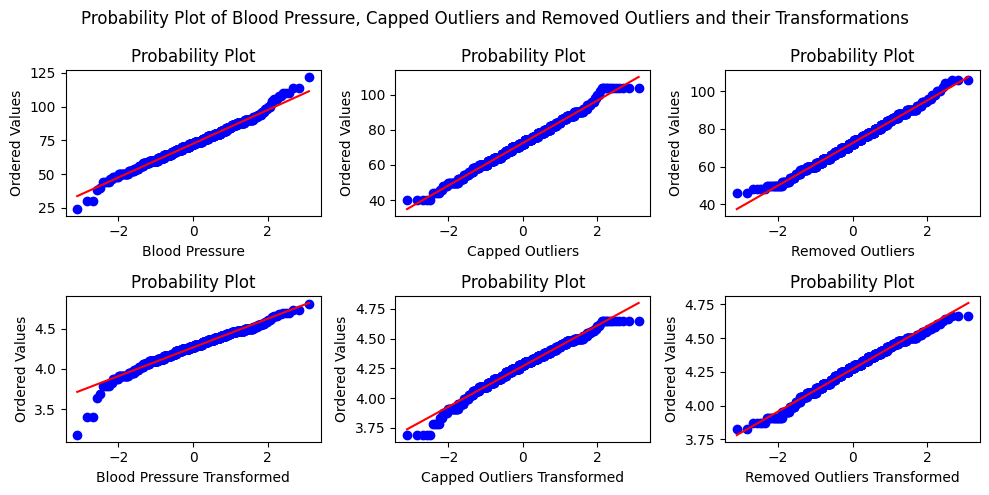

In [97]:
# probability plots of bp, capped, removed outliers and transformations
plt.figure(figsize=(10,5))
plt.suptitle('Probability Plot of Blood Pressure, Capped Outliers and Removed Outliers and their Transformations')

plt.subplot(2,3,1)
stats.probplot(x=bp, dist='norm', plot=plt)
plt.xlabel('Blood Pressure')

plt.subplot(2,3,2)
stats.probplot(x=bp_capped, dist='norm', plot=plt)
plt.xlabel('Capped Outliers')

plt.subplot(2,3,3)
stats.probplot(x=bp_noO, dist='norm', plot=plt)
plt.xlabel('Removed Outliers')

plt.subplot(2,3,4)
stats.probplot(x=trans_bp, dist='norm', plot=plt)
plt.xlabel('Blood Pressure Transformed')

plt.subplot(2,3,5)
stats.probplot(x=trans_bp_capped, dist='norm', plot=plt)
plt.xlabel('Capped Outliers Transformed')

plt.subplot(2,3,6)
stats.probplot(x=trans_bp_noO, dist='norm', plot=plt)
plt.xlabel('Removed Outliers Transformed')

plt.tight_layout()
plt.show()

# Heatmap

* Glucose
* Bp
* SkinThickness
* Insulin
* BMI

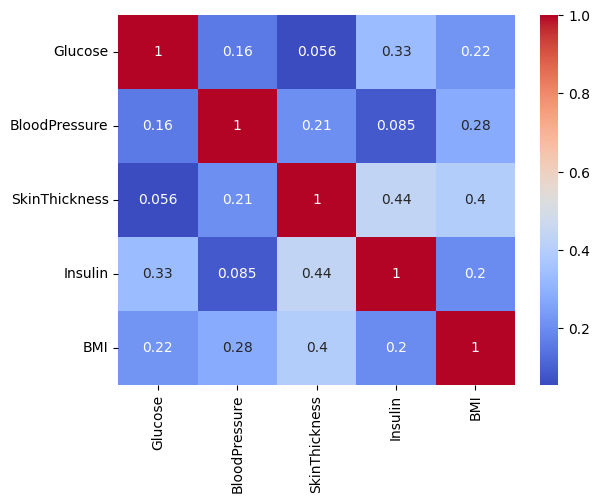

In [98]:
var = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

corr_stats = df_diab[var].corr()
sns.heatmap(corr_stats, annot=True, cmap='coolwarm')

plt.show()

# Data Processing

In [99]:
# Group the patients by number of pregnancies, along with the average age, 
#  and the count of patients in that group, along with their average BloodPressure.

df_diab.groupby('Pregnancies').agg({'Age':['mean','count'], 'BloodPressure':'mean'})

Age       BloodPressure
                  mean count          mean
Pregnancies                               
0            27.302752   109     67.247706
1            27.773723   137     68.087591
2            27.057692   104     63.134615
3            28.934211    76     66.552632
4            33.123077    65     69.600000
5            39.290909    55     76.145455
6            39.340000    50     68.420000
7            41.136364    44     70.886364
8            45.000000    40     75.225000
9            44.482759    29     78.241379
10           42.363636    22     69.954545
11           44.545455    11     74.181818
12           47.444444     9     76.333333
13           44.800000    10     79.200000
14           42.000000     2     70.000000
15           43.000000     1     70.000000
17           47.000000     1     72.000000

In [100]:
# Add a new column named ‘BMI/Age’ 
#   with the value of BMI over the Age, without using any loops.

df_diab['BMI/Age'] = df_diab['BMI']/df_diab['Age']

In [101]:
# Without looping the rows, add a new column named ‘risk’ with the following rules:
# High: if BMI > 45 and BloodPressure > 100
# Medium: if 30 < BMI < 45 and BloodPressure < 100
# Low: if BMI < 30
# Unknown: otherwise

conditions = [(df_diab['BMI'] > 45) & (df_diab['BloodPressure'] > 100), \
            (df_diab['BMI'] > 30) & (df_diab['BMI'] < 45) & (df_diab['BloodPressure'] < 100), \
            (df_diab['BMI'] < 30)]

choices = ['High', 'Medium', 'Low']

df_diab['Risk'] = np.select(condlist=conditions, choicelist=choices, default='otherwise')

In [102]:
# The file named ages.csv provides the age group names. 
#    Merge the two dataframes by the age, the resulted dataframe must 
#    contain all the columns of diabetes.csv, in addition to their age group in the column named ‘AgeGroup’.

df = pd.merge(left=df_diab,right=df_ages,how='inner',on='Age')

In [103]:
# one-hot encode the categorical variable ‘AgeGroup’ 
#   and add the resulting columns to diabetes.cvs, and remove AgeGroup.

df_hot = pd.get_dummies(df['AgeGroup'], prefix='AgeGroup')


In [104]:
pd.concat([df,df_hot], axis= 1).drop('AgeGroup', axis=1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI/Age,Risk,AgeGroup_Adolescent,AgeGroup_Adult,AgeGroup_Senior
0,6,148,72.0,35,0,33.6,0.627,50,1,0.672000,Medium,False,True,False
1,8,99,84.0,0,0,35.4,0.388,50,0,0.708000,Medium,False,True,False
2,7,136,90.0,0,0,29.9,0.210,50,0,0.598000,Low,False,True,False
3,1,164,82.0,43,67,32.8,0.341,50,0,0.656000,Medium,False,True,False
4,11,138,74.0,26,144,36.1,0.557,50,1,0.722000,Medium,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,8,120,78.0,0,0,25.0,0.409,64,0,0.390625,Low,False,False,True
761,4,145,82.0,18,0,32.5,0.235,70,1,0.464286,Medium,False,False,True
762,8,91,82.0,0,0,35.6,0.587,68,0,0.523529,Medium,False,False,True
763,5,136,82.0,0,0,0.0,0.640,69,0,0.000000,Low,False,False,True


In [105]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI/Age,Risk,AgeGroup
0,6,148,72.0,35,0,33.6,0.627,50,1,0.672000,Medium,Adult
1,8,99,84.0,0,0,35.4,0.388,50,0,0.708000,Medium,Adult
2,7,136,90.0,0,0,29.9,0.210,50,0,0.598000,Low,Adult
3,1,164,82.0,43,67,32.8,0.341,50,0,0.656000,Medium,Adult
4,11,138,74.0,26,144,36.1,0.557,50,1,0.722000,Medium,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
760,8,120,78.0,0,0,25.0,0.409,64,0,0.390625,Low,Senior
761,4,145,82.0,18,0,32.5,0.235,70,1,0.464286,Medium,Senior
762,8,91,82.0,0,0,35.6,0.587,68,0,0.523529,Medium,Senior
763,5,136,82.0,0,0,0.0,0.640,69,0,0.000000,Low,Senior


In [106]:
df_hot

,AgeGroup_Adolescent,AgeGroup_Adult,AgeGroup_Senior
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
760,False,False,True
761,False,False,True
762,False,False,True
763,False,False,True
